In [4]:
# PANUTAD SIRIKUL
# 650510714

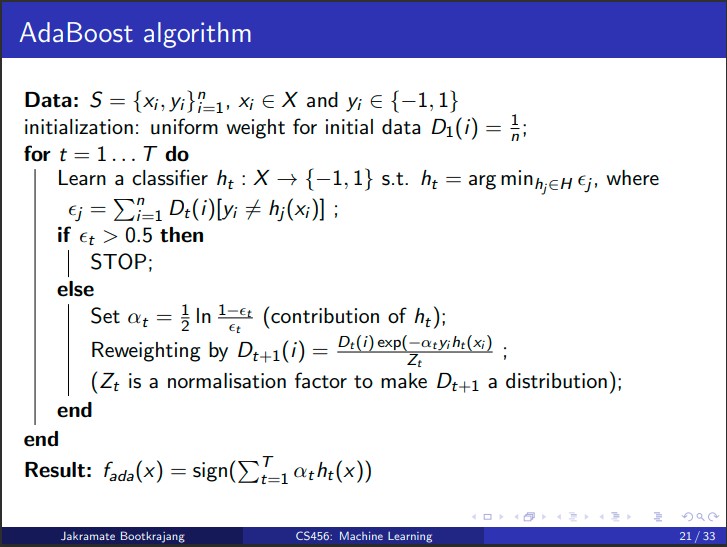

In [1]:
# French's AdaBoost here
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier # Use Decision Stump
##################################################
# Data: S = {xi, yi} i=1 to n, xi ∈ X and yi ∈ {-1, 1}
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)
y = np.where(y == 0, -1, 1)  # Convert labels to {-1, 1}

# Initailization: uniform weight from initial data D(i) = 1/n;
n = len(y) # Number of data points (y)
D = np.full(n, 1 / n)

# For t = 1...T do
T = 100 # Number of iterations (weak learners)

weak_learners = []
alphas = []
for t in range(T):
    # Step 1: สามารถเลือก base learner (สมาชิกของ ensemble) ตามชอบได้
    # แต่ควรต้องเป็น unstable classifier อย่างเช่น decision tree แบบ decision stump
    stump = DecisionTreeClassifier(max_depth=1)  # Decision stump
    stump.fit(X, y, sample_weight=D)  # Train with weighted samples
    predictions = stump.predict(X)

    # Step 2: Calculate weighted error (εt)
    epsilon_t = np.sum(D * (predictions != y))  # Weighted error


    # Step 3: Check error rate
    if epsilon_t > 0.5:
        break # Stop if error is too high

    # Step 4: Calculate contribution (at)
    alpha_t = 0.5 * np.log((1 - epsilon_t) / epsilon_t)  # Model weight

    # Step 5: Update weights (D_t+1)
    D = D * np.exp(-alpha_t * y * predictions)
    D /= np.sum(D)  # Normalize

    weak_learners.append(stump)
    alphas.append(alpha_t)

def ada_predict(X):
    weighted_sum = sum(alpha * stump.predict(X) for alpha, stump in zip(alphas, weak_learners))
    return np.sign(weighted_sum)

Accuracy: 1.0


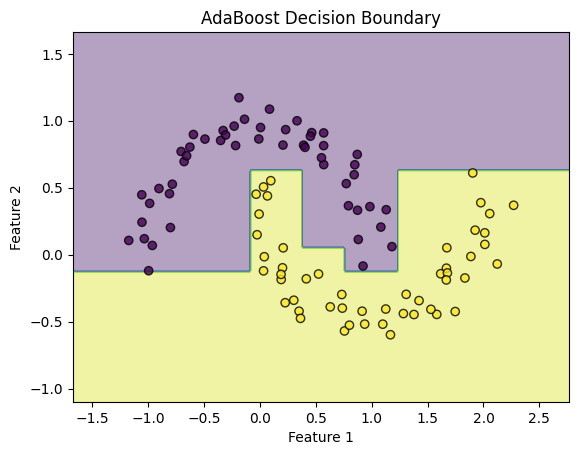

In [3]:
# Evaluate the classifier
predictions = ada_predict(X)
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy}")

# Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolor='k')
    plt.title('AdaBoost Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(ada_predict, X, y)